# Question 1

A linear regression takes the form of $\hat y=\beta_ix + \beta_0 + \epsilon $. Let's explain symbol by symbol what this means. $\hat y$ is the estimated y value given a x value. $\beta_i$ is the slope of the regression line. x is the input or the independent variable. $\beta_0$ is the y-intercept of the line or the y-value when the independent variable is 0. $\epsilon$ is a error distribution, or the difference between the actual y values and the estimated y values. Now let's generate some random data and show how this works.

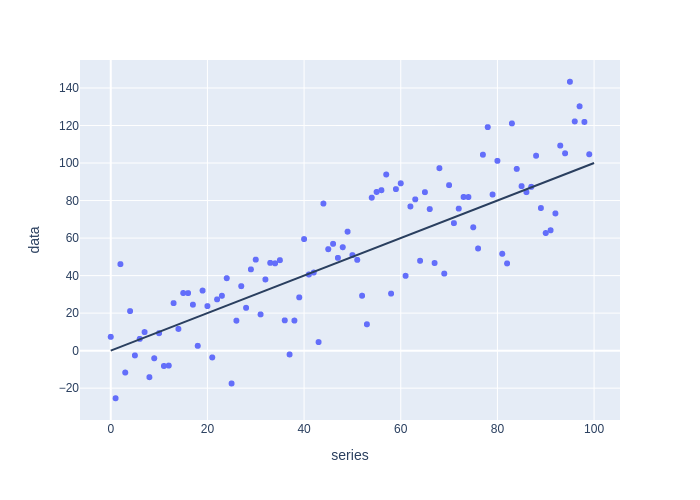

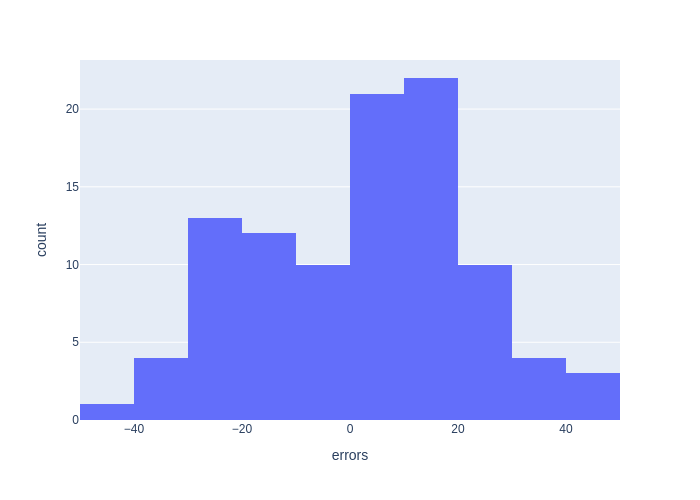

In [12]:
import pandas as pd
import plotly.express as pv
import numpy
# Generate random data
series = []
data = []
for i in range(100):
    series.append(i)
    data.append(i+20*numpy.random.normal(0,1))
df = pd.DataFrame({"series" : series, "data" : data})
fig = pv.scatter(df, x="series", y="data")
fig.add_shape(type = "line", x0 = 0, y0=0,x1=100,y1=100)
fig.show(renderer="png")

#calculate errors
errors = []
for i in range(len(data)):
    errors.append(data[i]-series[i])
df = pd.DataFrame({"series" : series, "errors" : errors})
pv.histogram(df, x="errors").show(renderer="png")

Notice how the errors are normally distributed or random, meaning the linear regression is good.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 2

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     314.7
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.32e-32
Time:                        04:07:12   Log-Likelihood:                -422.75
No. Observations:                 100   AIC:                             849.5
Df Residuals:                      98   BIC:                             854.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4612      3.326     -0.439      0.6

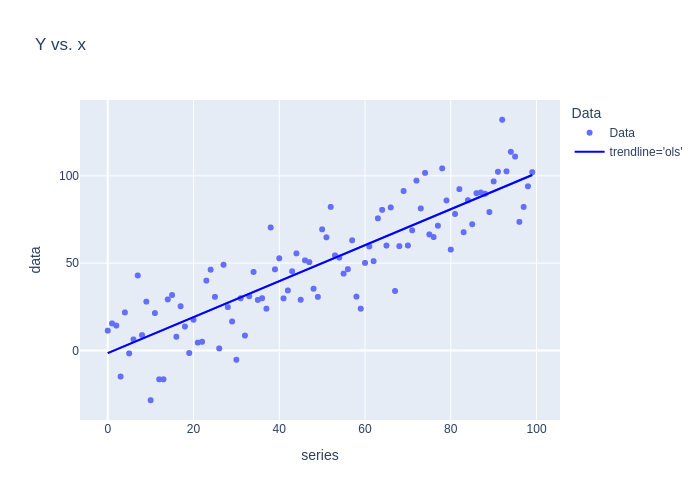

In [34]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# Generate random data
series = []
data = []
for i in range(100):
    series.append(i)
    data.append(i+20*numpy.random.normal(0,1))
df = pd.DataFrame({"series" : series, "data" : data})

# what are the following two steps doing?
model_data_specification = smf.ols("data~series", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
print(fitted_model.summary())  # simple explanation? the summary of details of regression
print(fitted_model.summary().tables[1])  # simple explanation? part of the summary - only details about beta_0 and beta_1
print(fitted_model.params)  # simple explanation? values of beta_0 and beta_1 (in float64 with datatype)
print(fitted_model.params.values)  # simple explanation? values of beta_0 and beta_1 (in numpy array form)
print(fitted_model.rsquared)  # simple explanation? gives rsquared value, as known as coefficient of determination

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='series',  y='data', color='Data', 
                 trendline='ols', title='Y vs. x')


# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['series'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'").show(renderer="png")

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 3

There are two regression lines. The black line is the theoritical line and the blue line is the experiment line. The black line was created based on the parameters of the population ($\beta_0 = 0$, $\beta_1 = 1$). The blue line was created from a sampling of data with errors drawn from the normal model. As the sample sizes increases, the characteristics of the blue line should approach those of the black line.


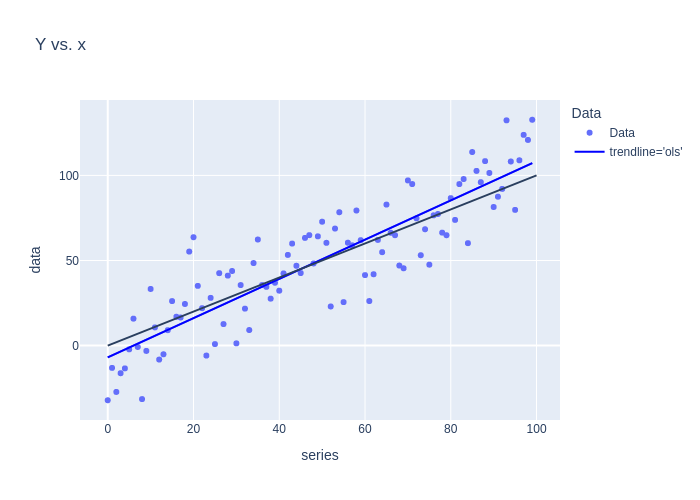

In [35]:
import statsmodels.formula.api as smf  # what is this library for?
import plotly.express as px  # this is a ploting library

# Generate random data
series = []
data = []
for i in range(100):
    series.append(i)
    data.append(i+20*numpy.random.normal(0,1))
df = pd.DataFrame({"series" : series, "data" : data})

# what are the following two steps doing?
model_data_specification = smf.ols("data~series", data=df) 
fitted_model = model_data_specification.fit() 


# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='series',  y='data', color='Data', 
                 trendline='ols', title='Y vs. x')
fig.add_shape(type='line',x0=0,y0=0,x1=100,y1=100)

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['series'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'").show(renderer="png")

# Question 4

The fitted y's are calculated by the following process using values found in fitted_model.summary().tables[1]:

$ \hat y_i = \hat \beta_0 + \hat \beta_1 \cdot x_i $.

$ \hat \beta_0 $ is found as the intercept coefficient. $ \hat \beta_1 $ is found as the x (or whatever you called the independent variable) coefficient. $ x_i $ values are pulled straight from the data.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 5

The line is choosen by minimizing the sum of squared distances between the y values and the predicted y values. We square them so that negative and positive differences don't cancel out.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 6

To explain the first expression we will break into smaller parts. (Y-fitted_model.fittedvalues)\**2).sum() is the sum of squares of the errors. And (Y-Y.mean())\**2).sum() is the sum of squared residuals. Dividing the first by second yields the proportion of residual that cannot be attributed to the error. Then we take 1 minus the result to get the proportion of the variation (as shown through the residuals) that can be attributed to the error. R_squared is equivalent to the process above so in this way it represents the accuracy of the model.

Likewise np.corrcoef(Y,x)[0,1] fetches the coefficient of determination between the y values and x values, which squared yields the same R_squared as described above.

Interestingly enough, np.corrcoef(Y,fitted_model.fittedvalues)[0,1] fetches the coefficient of determination between the y values and predicted y values, which squared yields the same exact R_squared as above!

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 7

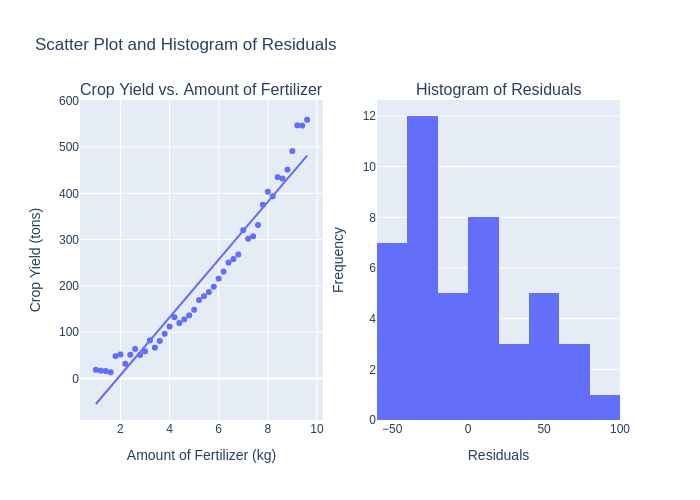

In [36]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

You can tell that the residuals are not normally distributed, so the residuals are not independent from the x values which is a necessary assumption that needs to be made for linear regressions. 

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 8

The null hypothesis is if there is no correlation and because slope = $r \cdot \frac{s_y}{s_x} $, we can instead use $H_0 = 0$

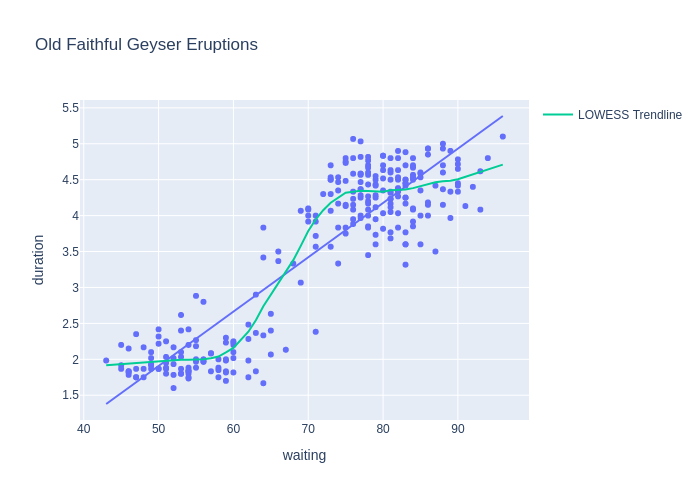

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:08:30   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

Notice that the p-value is less than .001, so it is very strong evidence against the null hypothesis

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 9



In [25]:
import plotly.express as px
import statsmodels.formula.api as smf


waits = [62, 64, 66]
for short_wait_limit in waits:
    short_wait = old_faithful.waiting < short_wait_limit

    print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

    #fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


For short wait time limit of 62 minutes, the p-value was calculated to be .238 (which is >.1). This means there is no evidence against the null hypothesis.

For short wait time limit of 64 minutes, the p-value was calculated to be .036 (which is <.05). This means there is moderate evidence against the null hypothesis.

For short wait time limit of 66 minutes, the p-value was calculated to be .000 (which is <.001). This means there is very strong evidence against the null hypothesis.

In this way, within the context of only short wait times, there is evidence in the data for a relationship between duration and wait time in the same manner as in the full data set for the second and third case. However, it is worthy to note that the correlation is not as strong.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 10 



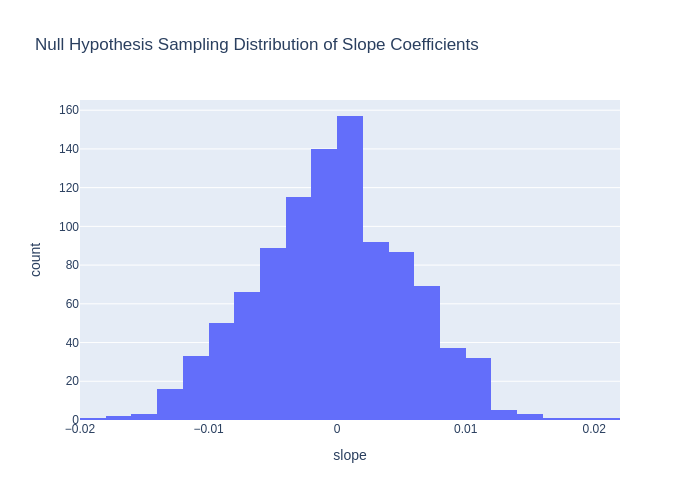

Observed Slope: 0.012244029446523483
95% Bootstrapped Confidence Interval: (0.00036485430246096953, 0.023078650568497738)
Is observed slope within 95% CI? True
Simulated p-value: 0.032
OLS Model Summary p-value: 0.038135755338567744


In [38]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
old_faithful = sns.load_dataset('geyser')
old_faithful = old_faithful[old_faithful['waiting'] > 71]

# Step 1: Scatter plot with OLS Regression Trendline
fig = px.scatter(
    old_faithful, x='waiting', y='duration', 
    title="Old Faithful Geyser Eruptions", 
    trendline='ols'
)

# Add LOWESS Trendline
lowess = sm.nonparametric.lowess
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show()

# Step 2: Bootstrap Sampling for Slope Distribution
bootstrap_slopes = []
n_bootstraps = 1000
n = len(old_faithful)

for _ in range(n_bootstraps):
    sample = old_faithful.sample(n, replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Convert to DataFrame for Plotting
bootstrap_slopes_df = pd.DataFrame(bootstrap_slopes, columns=['slope'])

# Plot Bootstrap Distribution of Slope
fig = px.histogram(bootstrap_slopes_df, x='slope', nbins=30, 
                   title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.show()

# Step 3: Simulate Under Null Hypothesis (No Association)
null_slopes = []
for _ in range(n_bootstraps):
    y_null = np.random.normal(old_faithful['duration'].mean(), old_faithful['duration'].std(), n)
    sample = pd.DataFrame({'waiting': old_faithful['waiting'], 'duration': y_null})
    model = smf.ols('duration ~ waiting', data=sample).fit()
    null_slopes.append(model.params['waiting'])

# Convert to DataFrame for Plotting
null_slopes_df = pd.DataFrame(null_slopes, columns=['slope'])

# Plot Null Distribution of Slope
fig = px.histogram(null_slopes_df, x='slope', nbins=30, 
                   title="Null Hypothesis Sampling Distribution of Slope Coefficients")
fig.show(renderer="png")

# Step 4: Confidence Interval and p-value Comparison
observed_model = smf.ols('duration ~ waiting', data=old_faithful).fit()
observed_slope = observed_model.params['waiting']

# 95% Confidence Interval from Bootstrap
ci_lower = np.percentile(bootstrap_slopes, 2.5)
ci_upper = np.percentile(bootstrap_slopes, 97.5)

# Check if observed slope is within 95% CI
in_confidence_interval = ci_lower <= observed_slope <= ci_upper

# Calculate p-value for observed slope in null distribution
p_value = (np.sum(np.abs(null_slopes) >= np.abs(observed_slope)) / n_bootstraps)

print("Observed Slope:", observed_slope)
print("95% Bootstrapped Confidence Interval:", (ci_lower, ci_upper))
print("Is observed slope within 95% CI?", in_confidence_interval)
print("Simulated p-value:", p_value)

# Compare with smf.ols summary p-value
summary_p_value = observed_model.pvalues['waiting']
print("OLS Model Summary p-value:", summary_p_value)

Chat link: https://chatgpt.com/share/672d7d3b-2f2c-8011-aca1-71533935eb46

# Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2641,0.047,47.762,0.000,2.171,2.357
"C(kind, Treatment(reference=""short""))[T.long]",2.0802,0.062,33.656,0.000,1.959,2.202


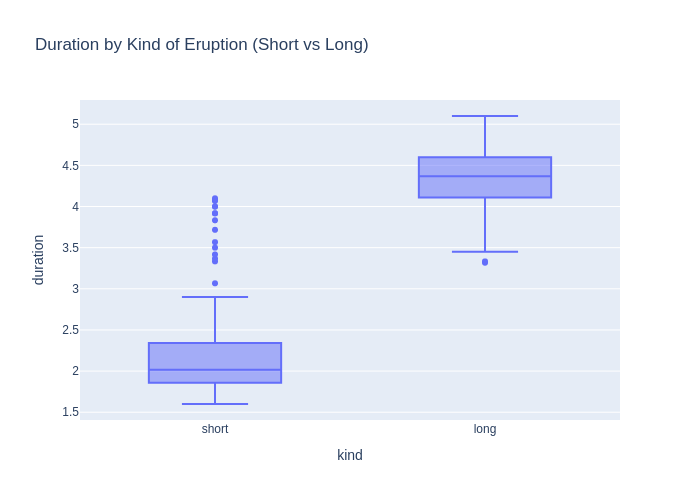

In [39]:
from IPython.display import display
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Categorize 'waiting' time into 'short' and 'long' kinds of eruptions
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x <= 71 else 'long')

# Perform OLS regression with 'kind' as a categorical variable with "short" as the reference category
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary table for the regression coefficients
display(model.summary().tables[1])

# Create a box plot comparing duration across 'short' and 'long' categories
fig = px.box(
    old_faithful, x='kind', y='duration', 
    title='Duration by Kind of Eruption (Short vs Long)',
    category_orders={'kind': ['short', 'long']}
)

fig.show(renderer="png")  # For GitHub/MarkUs, use `fig.show(renderer="png")`

The fundamental difference between this regression and past regressions, is that we are looking at the times as two categories. From here, we can create a regression that predicts the duration based on a values membership in one of the categories.

From the code generated by chatbot, we can see that the p-value is less than .001 for this OLS regression. This means there is very strong evidence against the null hypothesis, or in other words, there is an assocation between the category of wait times and duration.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 12 

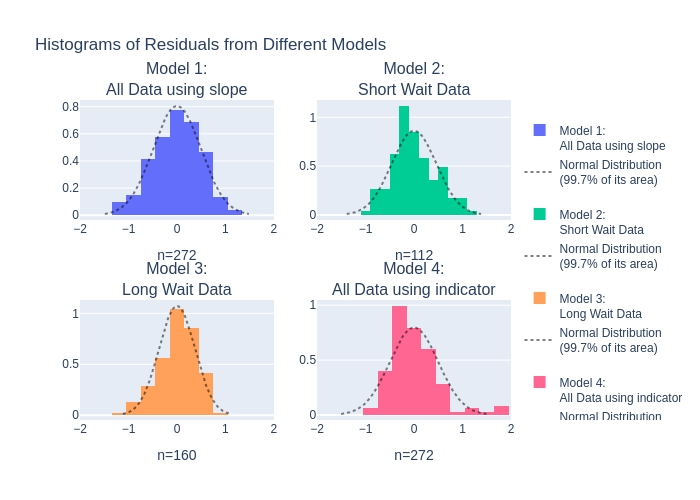

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[old_faithful['waiting'] <= 71]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[old_faithful['waiting'] > 71]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model one is the best because some bins on either side of the mean are above and below the normal model. Model 2 and model 4 have many more bins on the left side over the normal model than bins on the right side over the model. Model 3 has many more bins on the right side over the normal model than bins on the left.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 13



In [33]:
import numpy as np
import seaborn as sns
import pandas as pd

# Load the dataset and categorize 'kind' based on waiting time
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x <= 71 else 'long')

# Separate data into 'short' and 'long' groups
short_durations = old_faithful[old_faithful['kind'] == 'short']['duration']
long_durations = old_faithful[old_faithful['kind'] == 'long']['duration']

# Calculate the observed mean difference
observed_mean_diff = long_durations.mean() - short_durations.mean()

# (A) Permutation Test
n_permutations = 10000
permuted_diffs = []

for _ in range(n_permutations):
    # Combine both groups and shuffle
    combined = np.concatenate([short_durations, long_durations])
    np.random.shuffle(combined)
    
    # Split back into 'short' and 'long' groups
    permuted_short = combined[:len(short_durations)]
    permuted_long = combined[len(short_durations):]
    
    # Calculate mean difference for permuted groups
    permuted_diffs.append(permuted_long.mean() - permuted_short.mean())

# Calculate p-value for observed mean difference
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_mean_diff))

print("Observed Mean Difference:", observed_mean_diff)
print("Permutation Test p-value:", p_value)

# (B) Bootstrap Confidence Interval
n_bootstraps = 10000
bootstrapped_mean_diffs = []

for _ in range(n_bootstraps):
    # Bootstrap resample within each group
    boot_short = np.random.choice(short_durations, size=len(short_durations), replace=True)
    boot_long = np.random.choice(long_durations, size=len(long_durations), replace=True)
    
    # Calculate mean difference for bootstrap samples
    bootstrapped_mean_diffs.append(boot_long.mean() - boot_short.mean())

# Calculate 95% Confidence Interval
ci_lower, ci_upper = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

print("95% Bootstrap Confidence Interval for Mean Difference:", (ci_lower, ci_upper))


Observed Mean Difference: 2.0801883928571434
Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval for Mean Difference: (1.9472945312500005, 2.207898147321429)


In the permutation test, we shuffle the data up and repeatively select one long waiting time and one short waiting time, the calculation and calculate the difference. We keep a running total of the differences that exceed the observed mean difference to calculate a p-value.

In the second simulation, we also shuffle the data up and repeatively select one long waiting time and one short waiting time, but this time calculate a confidence interval.

This is different from the indicator model (categorical regression) because it is nonparamatric, meaning we do not care about the effect of characteristics of the population on the efficacy of our tests. Earlier, we had to make sure that the errors were normally distributed. These methods are more applicable because they largely refer to the empirical distribution instead of theoritical distributions so they have less assumption requirements.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f

# Question 14

Yes.

https://chatgpt.com/c/672d7bc1-69f8-8011-8ed5-b441308c0c5f